In [1]:
pip list

Package                       Version        Editable project location
----------------------------- -------------- ----------------------------------------------------------------
absl-py                       2.3.0
adjustText                    0.7.3
aiohappyeyeballs              2.6.1
aiohttp                       3.12.7
aiosignal                     1.3.2
alabaster                     1.0.0
anndata                       0.11.4
anyio                         4.9.0
arboreto                      0.1.6
argon2-cffi                   25.1.0
argon2-cffi-bindings          21.2.0
array-api-compat              1.12.0
arrow                         1.3.0
asciitree                     0.3.3
asttokens                     3.0.0
async-lru                     2.0.5
async-timeout                 5.0.1
attrs                         25.3.0
babel                         2.17.0
beautifulsoup4                4.13.4
biopython                     1.85
bleach                        6.2.0
blosc2              

Note: you may need to restart the kernel to use updated packages.


In [2]:
cd /cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC

/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC


/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/conda-envs/yz310/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import os, re, warnings
from typing import Dict, List, Tuple, Optional
import numpy as np
import pandas as pd
import anndata as ad
from scipy import sparse
import pyBigWig

In [4]:
import scCAMEL as scm
from scCAMEL import CamelGuanACoWig

In [5]:
import muon as mu
import anndata

# read mudata or directly read anndata
mdata = mu.read("10k_3k_RNA_ATAC_merge.h5mu")
mdata

/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/conda-envs/yz310/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/conda-envs/yz310/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 8677 × 124015
  2 modalities
    rna:	8677 x 36591
      obs:	'Cluster', 'Dataset'
    atac:	8677 x 87424
      obs:	'Cluster', 'Dataset'

In [7]:
#convert mudata to adata, and select 10k dataset
adata=mdata["atac"][mdata["atac"].obs["Dataset"]=="10X10k"]
adata

View of AnnData object with n_obs × n_vars = 6397 × 87424
    obs: 'Cluster', 'Dataset'

In [8]:
#prepare with chosen chromosomes
pipe = CamelGuanACoWig.TACoWig(adata, celltype_key="Cluster",
               allow_chroms=["chr"+str(i) for i in range(1,23)]+["chrX","chrY"],
               resolve_overlaps=True, scale=10.0, outdir="/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/")
pipe.prepare_intervals()

[PREP] Parsing peak intervals
[PREP] Resolving overlaps with PyRanges (shift previous end)
[PREP] Reordered matrix: (6397, 87398)
[PREP] Inferred chrom sizes (24 entries)


In [9]:
# generate BigWig files
pipe.aggregate()
files = pipe.write_bigwigs()
files

[AGG] Aggregation='mean' by 'Cluster' on 7 groups
[WRITE] Monocyte_Classical -> /cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/Monocyte_Classical.bigwig
[WRITE] CD4+Tcells -> /cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/CD4_Tcells.bigwig
[WRITE] CD8+Tcells -> /cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/CD8_Tcells.bigwig
[WRITE] BCells -> /cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/BCells.bigwig
[WRITE] NK -> /cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/NK.bigwig
[WRITE] Monocyte_NonClassical -> /cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/Monocyte_NonClassical.bigwig
[WRITE] DCs -> /cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/DCs.bigwig
[DONE] Wrote 7 BigWig file(s) to '/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/'


['/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/Monocyte_Classical.bigwig',
 '/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/CD4_Tcells.bigwig',
 '/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/CD8_Tcells.bigwig',
 '/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/BCells.bigwig',
 '/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/NK.bigwig',
 '/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/Monocyte_NonClassical.bigwig',
 '/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/DCs.bigwig']

# Test bigwig files in coolbox

In [10]:
import coolbox
from coolbox.api import *

In [11]:
coolbox.__version__

'0.3.9'

In [12]:
cd .

/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC


In [13]:
Monocyte_Classical=f"/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/Monocyte_Classical.bigwig"
Bcells=f'/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/BCells.bigwig'
Monocyte_NonClassical=f"/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/Monocyte_NonClassical.bigwig"
CD4Tcells=f"/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/CD4+Tcells.bigwig"
CD8Tcells=f"/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/CD8+Tcells.bigwig"
DCs=f"/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/DCs.bigwig"
NK=f"/cfs/klemming/projects/supr/yzstudio_naiss/Yizhou/PBMC/BigWigs/NK.bigwig"


In [14]:
from coolbox.core.track.base import Track
from coolbox.utilities import to_gr
import matplotlib.pyplot as plt

class ChromName(Track):
    def __init__(self, fontsize=50, offset=0.45):
        super().__init__({
            "fontsize": fontsize,
            "offset": offset,
        })  # init Track class

    def fetch_data(self, gr, **kwargs):
        return gr.chrom  # return chromosome name

    def plot(self, ax, gr, **kwargs):
        x = gr.start + self.properties['offset'] * (gr.end - gr.start)
        #ax.text(x, 0, gr.chrom, fontsize=self.properties['fontsize'])
        ax.text(x, 0, gr.chrom, fontsize=24)
        ax.set_xlim(gr.start, gr.end)

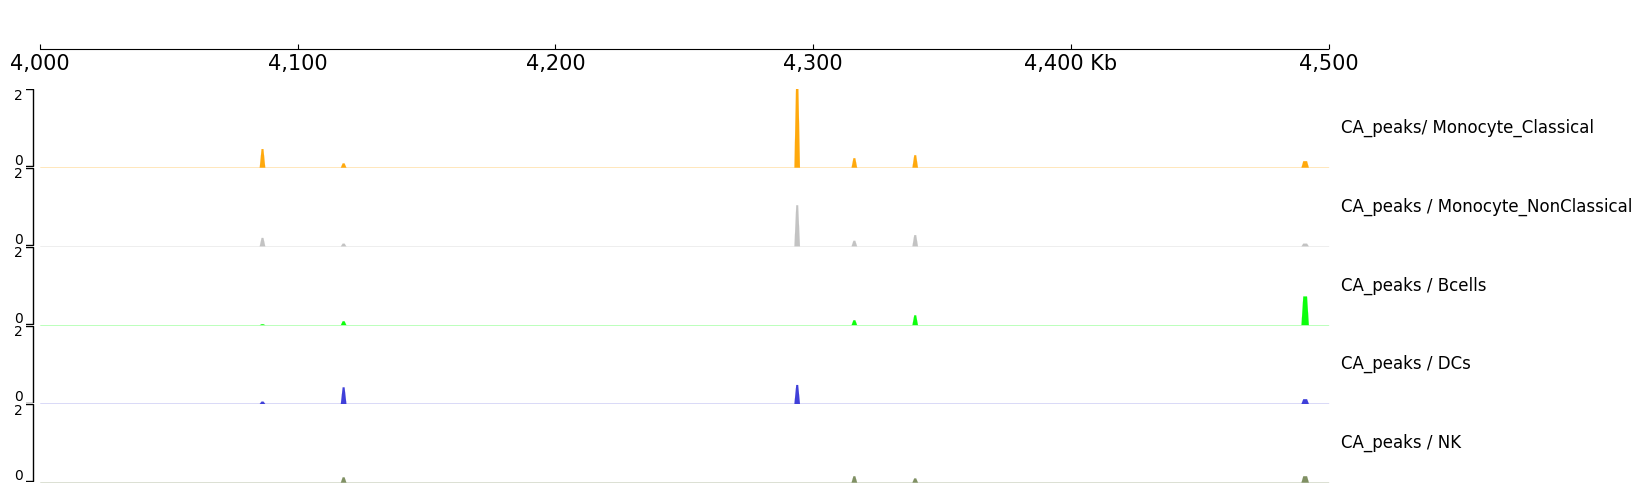

In [15]:
#Bridge_SCP=f"/mnt/e/LocalTemp/NBLtestGenomeTrack/Bridge_SCP.bigwig"
mx=2
mn=0
frame = \
    BigWig(Monocyte_Classical, max_value=mx, min_value=mn, alpha=0.95) + Color("#FFA500") + \
    Title("CA_peaks/ Monocyte_Classical") + \
    BigWig(Monocyte_NonClassical, max_value=mx, min_value=mn, alpha=0.95) + Color("#C0C0C0") + \
    Title("CA_peaks / Monocyte_NonClassical") + \
    BigWig(Bcells, max_value=mx, min_value=mn, alpha=0.95) + Color("#00FF00") + \
    Title("CA_peaks / Bcells")+ \
    BigWig(DCs, max_value=mx, min_value=mn, alpha=0.75) + Color("#0000CD") + \
    Title("CA_peaks / DCs")+ \
    BigWig(NK, max_value=mx, min_value=mn, alpha=0.75) + Color("#556b2f") + \
    Title("CA_peaks / NK")
frame = XAxis() + frame
frame.plot("chr9:4000000-4500000")